
## Data, URLs

### Weather Data
[Met Eireann Historical Data](https://www.met.ie/climate/available-data/historical-data)

Daily data is available from the 25 synoptic weather stations here
https://www.met.ie/climate/available-data/daily-data



### Athenry  
[Hourly wind data since 2010](https://cli.fusio.net/cli/climate_data/webdata/hly1875.zip)
[Daily ](https://cli.fusio.net/cli/climate_data/webdata/dly1875.zip)

### Units
All wind speed and highes gust units are in knots (kt).  A knot is one nautical mile per hour, or about 1.15 statute miles per hour or 1.852 km/h.

### Wind Speed
from [Google's Generative AI](https://www.google.com)
Large-scale wind turbines typically start turning at wind speeds of 7–9 miles per hour and reach their maximum output at around 27 miles per hour. They begin to reduce power or disconnect at wind speeds above 25 miles per hour. At these high speeds, the turbine's braking system activates to prevent damage to the blades. 
Efficiency
Wind turbines are most efficient at around 18 miles per hour. 
The consistency of the wind is more important than the speed for producing the most wind power. 

[Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)
Wind turbines typically start operating at wind speeds around Beaufort Force 3, or around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at Beaufort 5 (around 11-14 m/s or 25-30 mph).  1609.3m in a mile

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |  

**Table 1:** General Turbine Behaviour BY Wind Speed  

To take a specific example, the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) is use in the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/), located in the Cloosh Valley south-west of Oughterard in Co. Galway. 58 of these are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/), which utilises 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.

In [138]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import datetime as dt

Performance data for the Siemens SWT-3.0-101 3MW turbine was retrieved from [this site](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php). The performance can be classified as classified for various wind speeds as follows.  
  
| Wind Speed m/s | Performance |  
|----------------|-----------------|  
| Below 4  | Unacceptable  |  
| Between 4 and 8  | Poor  |  
| Between 8 and 11  | Good  |  
| Between 11 and 25  | Optimal  |  
| Above 25  | Unacceptable  |  

**Table 2:** Siemens Turbine Performance by Wind Speed  

(0.0, 27.0)

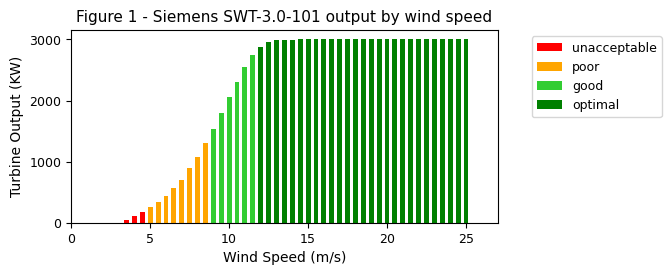

In [139]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
output = ['unacceptable','poor','good','optimal']
colours = ['red', 'orange', 'limegreen', 'green']
colourmap = {output[0]:colours[0], output[1]:colours[1], output[2]:colours[2], output[3]:colours[3]}

axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color=colours[0],width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color=colours[1],width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color=colours[2],width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color=colours[3],width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color=colours[0],width=0.31)
axes.set_title('Figure 1 - Siemens SWT-3.0-101 output by wind speed', fontsize=11)
axes.set_xlabel('Wind Speed (m/s)', fontsize=10)
axes.set_ylabel('Turbine Output (KW)', fontsize=10)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])


## Analysis - Weather Data
While there are 31 weather stations in Galway making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), most focus on precipitation and only 2 provide wind speed - Athenry and Mace Head. The study will focus on data from Athenry weather station.

According to the information in the header of the downloaded csv file, the fields we are interested in are:  
  
date:  -  00 to 00 utc  
wdsp:  -  Mean Wind Speed (kt)  
hm:    -  Highest ten minute mean wind speed (kt)                 
hg:    -  Highest Gust (kt)  

'kt' is the abbreviation for knot, or nautical miles per hour.  They convert as follows.  
  
| unit | knots | miles per hour |  kilometres per hour |  metres per second |  
|----------------|-----------------|--------------|--------------|--------------|  
| speed  | 1.0  | 1.151  |  1.852  | 0.514  |  

**Table 3:** Unit Conversions  

In [140]:
# Create a dataframe with the fields we are interested in.
athenry_weather = pd.read_csv("data/dly1875.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
belmullet_weather['date']= pd.to_datetime(belmullet_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2000-01-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
belmullet_weather = belmullet_weather.loc[(belmullet_weather['date']>=date1) & (belmullet_weather['date']<=date2)]
belmullet_weather = belmullet_weather.reset_index(drop=True)
belmullet_weather.dtypes

date    datetime64[ns]
wdsp           float64
hm              object
hg              object
dtype: object

In [141]:
# Review the first few rows
belmullet_weather.head(3)

,date,wdsp,hm,hg
0,2000-01-01,21.3,28,41
1,2000-01-02,20.0,47,67
2,2000-01-03,20.1,31,48


Windspeed was created as an object, because some cells countain a white space where wind data was not available on the day.
To convert to a numeric column, we need to replace the white space with a value that will be recognized as a number.

In [142]:
#for row in athenry_weather.itertuples():
    #if row.wdsp == ' ':
    #    print('found blank ', row)

athenry_weather['wdsp'] = athenry_weather['wdsp'].replace(' ',-999)
athenry_weather['wdsp'] = athenry_weather['wdsp'].astype(float)
athenry_weather['wdsp'] = athenry_weather['wdsp'].replace(-999,np.nan)
athenry_weather.dtypes


date     object
wdsp    float64
hm        int64
hg        int64
dtype: object

Next, convert wind speed from knots to metres per second (m/s), to align with the turbine ratings.  

In [143]:
knots_to_metres_per_sec = 0.514  # from Table 3 above
belmullet_weather['wdsp_ms']=round(belmullet_weather['wdsp']*knots_to_metres_per_sec, 2)
belmullet_weather.head(3)

,date,wdsp,hm,hg,wdsp_ms
0,2000-01-01,21.3,28,41,10.95
1,2000-01-02,20.0,47,67,10.28
2,2000-01-03,20.1,31,48,10.33


Text(0.5, 0, 'Date')

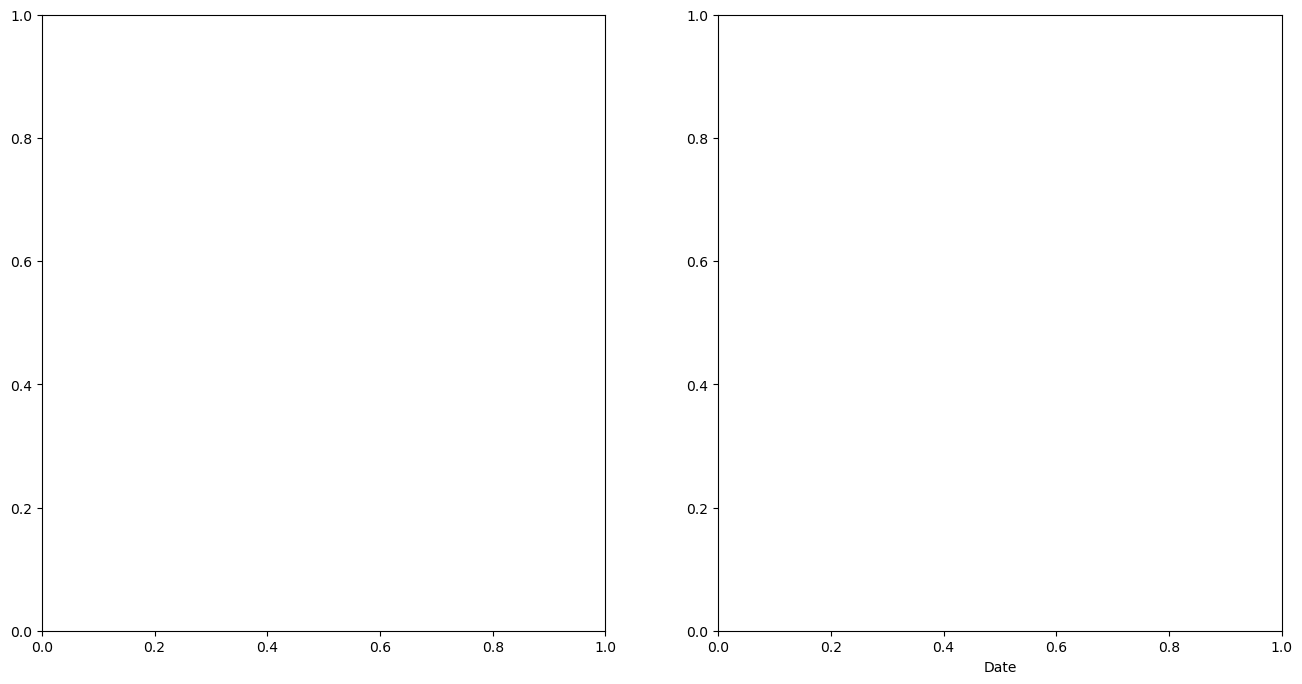

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax1 = axes[0]
ax2 = axes[1]
#ax1.plot(athenry_weather["date"], belmullet_weather["wdsp"]) # Comment out for now as takes a long time to run
plt.xlabel('Date')

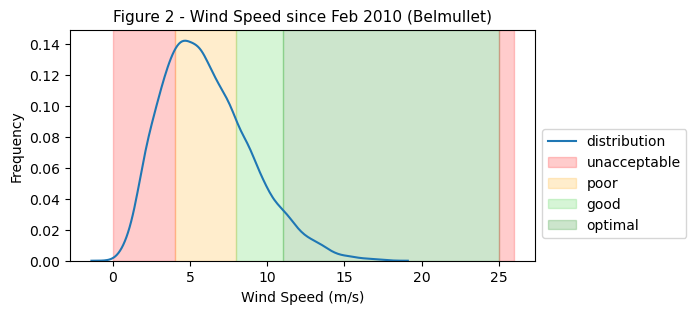

In [145]:
fig, axd = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axd = sns.kdeplot(belmullet_weather["wdsp_ms"], ax=axd)
#plt.axvline(x=4, color='red', linestyle='--')
axd.axvspan(0, 4, alpha=0.2, color=colours[0])
axd.axvspan(4, 8, alpha=0.2, color=colours[1])
axd.axvspan(8, 11, alpha=0.2, color=colours[2])
axd.axvspan(11, 25, alpha=0.2, color=colours[3])
axd.axvspan(25, 26, alpha=0.2, color=colours[0])
output1 = output.copy()
axd.set_title('Figure 2 - Wind Speed since Feb 2010 (Belmullet)', fontsize=11)
axd.set_xlabel('Wind Speed (m/s)', fontsize=10)
axd.set_ylabel('Frequency', fontsize=10)
# Allow this cell to be run independently multiple times
if output1[0] != "distribution":
    output1.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output1)
plt.show()


In [146]:
print(output)

['unacceptable', 'poor', 'good', 'optimal']


We will now add a column to the weather dataframe to categorize the windspeed as defined in Table 2 above.  
This will allow us to quantitatively assess how suitable Athenry is as a site.

In [147]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 
belmullet_weather['category']=''
count=0
for row in belmullet_weather.itertuples():
    print (row.wdsp_ms, end = ' ')
    if row.wdsp_ms <= 4.0:
        belmullet_weather.loc[count, 'category'] = output[0]
    elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
        belmullet_weather.loc[count, 'category'] = output[1]
    elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
        belmullet_weather.loc[count, 'category'] = output[2]
    elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
        belmullet_weather.loc[count, 'category'] = output[3]
    else:
        belmullet_weather.loc[count, 'category'] = output[0]
    count += 1

belmullet_weather.head(3)

10.95 10.28 10.33 12.7 17.06 10.54 17.73 11.46 8.12 10.74 6.78 7.14 11.82 8.74 0.57 3.19 5.35 5.24 3.39 4.42 4.47 8.22 1.64 2.36 0.51 3.34 6.12 11.21 11.56 11.67 11.26 8.84 8.89 8.84 13.11 11.72 15.42 13.52 14.65 16.71 13.21 13.36 12.03 5.19 9.61 10.18 11.92 7.92 10.74 3.86 8.38 7.45 8.22 11.31 10.49 9.56 12.34 10.02 10.18 6.01 7.3 11.46 8.79 4.32 10.79 10.18 10.18 10.95 7.45 9.3 4.63 7.2 7.14 6.58 5.5 4.63 5.14 4.52 5.96 5.5 6.27 4.57 5.76 7.97 9.25 7.86 3.29 4.11 4.78 2.93 2.47 5.65 15.32 12.64 6.58 4.63 6.94 10.02 3.96 5.35 4.11 9.56 12.44 12.54 6.07 5.35 6.42 4.63 2.93 7.92 10.9 9.35 6.27 4.37 6.94 14.44 13.83 6.12 4.06 2.52 4.16 3.29 5.86 6.58 5.6 4.78 4.06 8.22 5.4 6.73 7.09 5.35 9.15 8.74 8.74 11.72 5.04 8.84 9.25 5.91 8.48 5.65 7.45 8.38 7.3 7.09 5.91 4.88 3.44 3.39 2.83 6.94 10.23 9.46 8.53 4.78 4.42 8.33 7.86 13.11 6.58 10.54 9.25 13.11 10.13 3.7 2.88 4.11 4.32 3.19 5.91 7.86 9.66 7.4 7.35 4.42 2.98 2.31 1.9 2.26 2.26 4.63 4.47 5.65 4.68 4.78 5.55 8.02 5.71 6.73 8.43 10.38 5.

,date,wdsp,hm,hg,wdsp_ms,category
0,2000-01-01,21.3,28,41,10.95,good
1,2000-01-02,20.0,47,67,10.28,good
2,2000-01-03,20.1,31,48,10.33,good


In [148]:
summary = belmullet_weather['category'].value_counts()
print(summary)

category
poor            4641
unacceptable    2307
good            1595
optimal          558
Name: count, dtype: int64


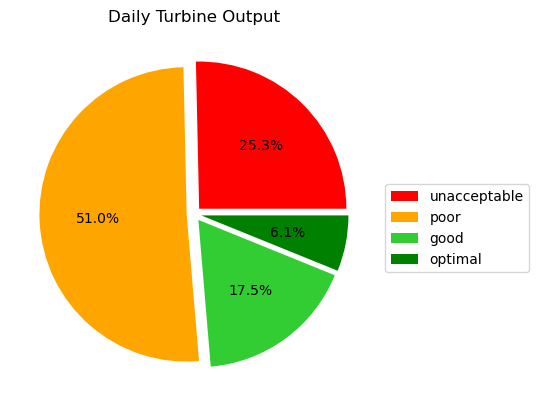

In [149]:
exp=[0.05, 0.05, 0.05, 0.05]

summary = summary.reindex(output)

summary.plot.pie(ylabel='',labels=None,title='Daily Turbine Output',autopct='%1.1f%%', colors=[colourmap[key] for key in summary.index], explode=exp)

# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=summary.index)
plt.subplots_adjust(right=0.7)

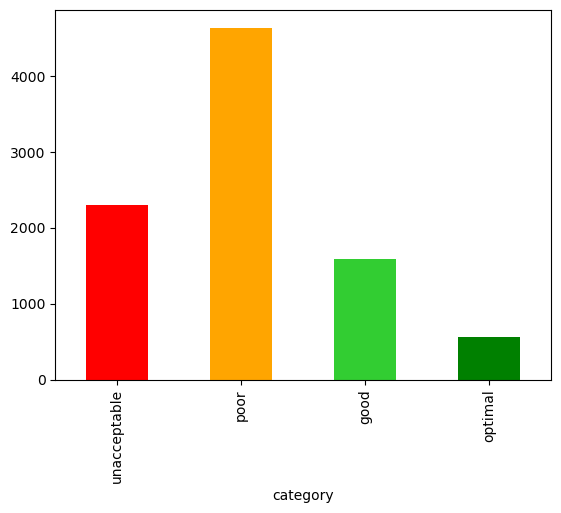

In [150]:
summary.plot.bar(color=[colourmap[key] for key in summary.index])
plt.show()

As can be seen from Figure (the pie chart), Athenry is not a suitable location for a wind farm. We will next look at a few other stations from around the country.


In [151]:
# Create a dataframe with the fields we are interested in.
macehead_weather = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp','hm','hg'], low_memory=False)
macehead_weather.dtypes

date    object
wdsp    object
hm      object
hg      object
dtype: object

In [152]:
macehead_weather.head(3)

,date,wdsp,hm,hg
0,14-aug-2003,6.7,13,17
1,15-aug-2003,6.5,12,15
2,16-aug-2003,5.7,10,13


In [153]:
macehead_weather['wdsp'] = macehead_weather['wdsp'].replace(' ',-999)
macehead_weather['wdsp'] = macehead_weather['wdsp'].astype(float)
macehead_weather['wdsp'] = macehead_weather['wdsp'].replace(-999,np.nan)
macehead_weather.dtypes

date     object
wdsp    float64
hm       object
hg       object
dtype: object

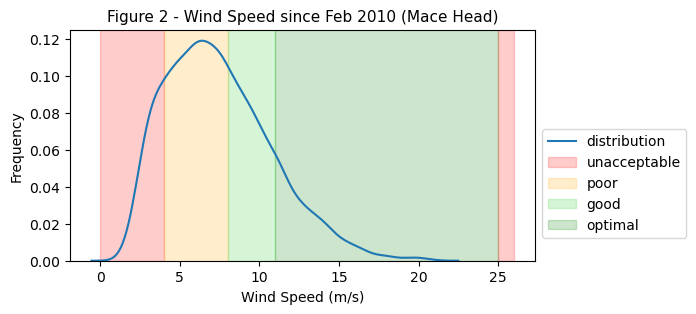

In [163]:
macehead_weather['wdsp_ms']=round(macehead_weather['wdsp']*knots_to_metres_per_sec, 2)
fig, axmh = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axmh = sns.kdeplot(macehead_weather["wdsp_ms"], ax=axmh)
#plt.axvline(x=4, color='red', linestyle='--')
axmh.axvspan(0, 4, alpha=0.2, color=colours[0])
axmh.axvspan(4, 8, alpha=0.2, color=colours[1])
axmh.axvspan(8, 11, alpha=0.2, color=colours[2])
axmh.axvspan(11, 25, alpha=0.2, color=colours[3])
axmh.axvspan(25, 26, alpha=0.2, color=colours[0])
output2 = output.copy()
axmh.set_title('Figure 2 - Wind Speed since Feb 2010 (Mace Head)', fontsize=11)
axmh.set_xlabel('Wind Speed (m/s)', fontsize=10)
axmh.set_ylabel('Frequency', fontsize=10)
# Allow this cell to be run independently multiple times
if output2[0] != "distribution":
    output2.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output2)
plt.show()


In [155]:
macehead_weather['date2']= pd.to_datetime(macehead_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
macehead_weather = macehead_weather.loc[(macehead_weather['date2']>=date1) & (macehead_weather['date2']<=date2)]
print(macehead_weather.head(3))
print(macehead_weather.tail(3))


             date  wdsp  hm  hg  wdsp_ms      date2
2340  01-mar-2010   4.4  10  12     2.26 2010-03-01
2341  02-mar-2010  14.0  20  27     7.20 2010-03-02
2342  03-mar-2010   8.0  18  26     4.11 2010-03-03
             date  wdsp  hm  hg  wdsp_ms      date2
7726  28-nov-2024  20.4  28  37    10.49 2024-11-28
7727  29-nov-2024  16.8  24  34     8.64 2024-11-29
7728  30-nov-2024  19.8  29  39    10.18 2024-11-30


In [156]:
# Function to clean up missing data and return the same number of entries from each dataset
def clean_data(df):
    #pd.options.mode.copy_on_write = True
    temp_df=df
    temp_df['date']= pd.to_datetime(temp_df['date'], format='%d-%b-%Y')
    date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
    date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
    temp_df = temp_df.loc[(temp_df['date']>=date1) & (temp_df['date']<=date2)]
    temp_df = temp_df.reset_index(drop=True)
    temp_df['wdsp'] = temp_df['wdsp'].replace(' ',-999)
    temp_df['wdsp'] = temp_df['wdsp'].astype(float)
    temp_df['wdsp'] = temp_df['wdsp'].replace(-999,np.nan)
    temp_df['wdsp_ms']=round(temp_df['wdsp']*knots_to_metres_per_sec, 2)
    return temp_df

# copy in the data for each of the selected stations, then normalise it 
weather_belmullet = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_belmullet = clean_data(weather_belmullet)

weather_macehead = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_macehead = clean_data(weather_macehead)

weather_dunsany = pd.read_csv("data/dly1375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_dunsany = clean_data(weather_dunsany)

weather_malinhead = pd.read_csv("data/dly1575.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_malinhead = clean_data(weather_malinhead)

weather_johnstown = pd.read_csv("data/dly1775.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_johnstown = clean_data(weather_johnstown)

weather_valentia = pd.read_csv("data/dly2275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
weather_valentia = clean_data(weather_valentia)

# Now create a combined dataframe with the windspeed column from each of the individual files
weather_all = weather_belmullet.copy()
weather_all.drop(columns=['wdsp'], inplace=True)
weather_all.rename(columns={'wdsp_ms': 'wdspms_belmullet'}, inplace=True)

weather_all['wdspms_dunsany'] = weather_dunsany['wdsp_ms']
weather_all['wdspms_johnstown'] = weather_johnstown['wdsp_ms']
weather_all['wdspms_macehead'] = weather_macehead['wdsp_ms']
weather_all['wdspms_malinhead'] = weather_malinhead['wdsp_ms']
weather_all['wdspms_valentia'] = weather_valentia['wdsp_ms']

weather_all.head(5)


,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
0,2010-03-01,0.72,1.64,2.06,2.26,6.12,1.54
1,2010-03-02,5.09,2.83,2.47,7.20,4.16,6.01
2,2010-03-03,4.16,3.24,3.55,4.11,6.37,2.67
3,2010-03-04,1.13,2.06,3.65,3.44,3.60,2.62
4,2010-03-05,0.87,1.64,2.72,2.31,5.04,1.54


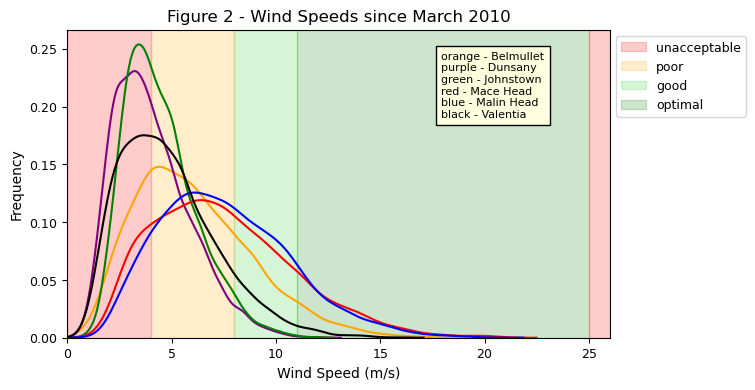

In [157]:
fig, ax_combined = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax_combined.axvspan(0, 4, alpha=0.2, color=colours[0])
ax_combined.axvspan(4, 8, alpha=0.2, color=colours[1])
ax_combined.axvspan(8, 11, alpha=0.2, color=colours[2])
ax_combined.axvspan(11, 25, alpha=0.2, color=colours[3])
ax_combined.axvspan(25, 26, alpha=0.2, color=colours[0])
ax_combined.set_title('Figure 2 - Wind Speeds since March 2010', fontsize=12)
ax_combined.set_xlabel('Wind Speed (m/s)', fontsize=10)
ax_combined.set_ylabel('Frequency', fontsize=10)
ax_combined.set_xlim(0, 26)

ax_combined = sns.kdeplot(weather_all["wdspms_belmullet"], ax=ax_combined, color='orange')
ax_combined = sns.kdeplot(weather_all["wdspms_dunsany"], ax=ax_combined, color='purple')
ax_combined = sns.kdeplot(weather_all["wdspms_johnstown"], ax=ax_combined, color='green')
ax_combined = sns.kdeplot(weather_all["wdspms_macehead"], ax=ax_combined, color='red')
ax_combined = sns.kdeplot(weather_all["wdspms_malinhead"], ax=ax_combined, color='blue')
ax_combined = sns.kdeplot(weather_all["wdspms_valentia"], ax=ax_combined, color='black')
colour_code = "orange - Belmullet\npurple - Dunsany\ngreen - Johnstown\nred - Mace Head\nblue - Malin Head\nblack - Valentia"
ax_combined.text(0.689, 0.93, colour_code, transform=ax_combined.transAxes, fontsize=8, va='top', bbox=dict(facecolor='lightyellow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=output, fontsize = 9)
plt.show()

In [158]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 2 

def categorise_wind(df):
    temp_df=df
    temp_df['category']=''
    count=0
    for row in temp_df.itertuples():
        if row.wdsp_ms <= 4.0:
            temp_df.loc[count, 'category'] = output[0]
        elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
            temp_df.loc[count, 'category'] = output[1]
        elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
            temp_df.loc[count, 'category'] = output[2]
        elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
            temp_df.loc[count, 'category'] = output[3]
        else:
            temp_df.loc[count, 'category'] = output[0]
        count += 1
    return temp_df

weather_belmullet = categorise_wind(weather_belmullet)
weather_dunsany = categorise_wind(weather_dunsany)
weather_johnstown = categorise_wind(weather_johnstown)
weather_macehead = categorise_wind(weather_macehead)
weather_malinhead = categorise_wind(weather_malinhead)
weather_valentia = categorise_wind(weather_valentia)

weather_all['category_belmullet'] = weather_belmullet['category']
weather_all['category_dunsany'] = weather_dunsany['category']
weather_all['category_johnstown'] = weather_johnstown['category']
weather_all['category_macehead'] = weather_macehead['category']
weather_all['category_malinhead'] = weather_malinhead['category']
weather_all['category_valentia'] = weather_valentia['category']

summary_belmullet = weather_belmullet['category'].value_counts().reindex(output)
summary_dunsany = weather_dunsany['category'].value_counts().reindex(output)
summary_johnstown = weather_johnstown['category'].value_counts().reindex(output)
summary_macehead = weather_macehead['category'].value_counts().reindex(output)
summary_malinhead = weather_malinhead['category'].value_counts().reindex(output)
summary_valentia = weather_valentia['category'].value_counts().reindex(output)

summary_all = summary_belmullet.copy()
summary_all = summary_all.to_frame('count_belmullet')
summary_all['count_dunsany'] = summary_dunsany.to_frame('count_dunsany')
summary_all['count_johnstown'] = summary_johnstown.to_frame('count_johnstown')
summary_all['count_macehead'] = summary_macehead.to_frame('count_macehead')
summary_all['count_malinhead'] = summary_malinhead.to_frame('count_malinhead')
summary_all['count_valentia'] = summary_valentia.to_frame('count_valentia')
summary_all.head(6)

,count_belmullet,count_dunsany,count_johnstown,count_macehead,count_malinhead,count_valentia
category,,,,,,
unacceptable,1384,2964,2462,811,638,2222
poor,2781,2246,2722,2461,2535,2629
good,925,175,202,1328,1495,455
optimal,299,4,3,789,721,83


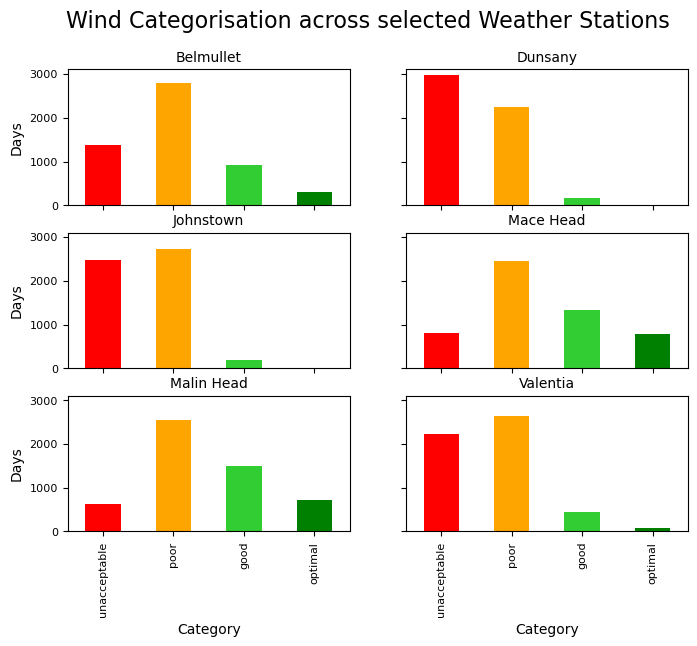

In [159]:
fig_all, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex='col', sharey='row')
fig_all.suptitle('Wind Categorisation across selected Weather Stations', fontsize=16)
summary_all.get('count_belmullet').plot.bar(ax=ax_all[0,0],color=[colourmap[key] for key in summary_all.index])

ax_all[0,0].set_title('Belmullet', fontsize=10)
ax_all[0,0].set_ylabel('Days', fontsize=10)
ax_all[0,0].tick_params(axis='y', labelsize=8)
ax_all[0,0].set_ylim(0, 3100)

summary_all.get('count_dunsany').plot.bar(ax=ax_all[0,1],color=[colourmap[key] for key in summary_all.index])
ax_all[0,1].set_title('Dunsany', fontsize=10)

summary_all.get('count_johnstown').plot.bar(ax=ax_all[1,0],color=[colourmap[key] for key in summary_all.index])
ax_all[1,0].set_title('Johnstown', fontsize=10)
ax_all[1,0].set_ylabel('Days', fontsize=10)
ax_all[1,0].tick_params(axis='y', labelsize=8)
ax_all[1,0].set_ylim(0, 3100)

summary_all.get('count_macehead').plot.bar(ax=ax_all[1,1],color=[colourmap[key] for key in summary_all.index])
ax_all[1,1].set_title('Mace Head', fontsize=10)

summary_all.get('count_malinhead').plot.bar(ax=ax_all[2,0],color=[colourmap[key] for key in summary_all.index])
ax_all[2,0].set_title('Malin Head', fontsize=10)
ax_all[2,0].set_ylabel('Days', fontsize=10)
ax_all[2,0].tick_params(axis='x', labelsize=8)
ax_all[2,0].tick_params(axis='y', labelsize=8)
ax_all[2,0].set_xlabel('Category', fontsize=10)
ax_all[2,0].set_ylim(0, 3100)

summary_all.get('count_valentia').plot.bar(ax=ax_all[2,1],color=[colourmap[key] for key in summary_all.index])
ax_all[2,1].set_title('Valentia', fontsize=10)
ax_all[2,1].set_xlabel('Category', fontsize=10)
ax_all[2,1].tick_params(axis='x', labelsize=8)

plt.show()

## Forward View
In this section, we will extrapolate the 1 month mean line to see if there  wind is going to 

[Datacamp](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python) was used as a refresher on calculating best fit coefficients, particularly where the x-axis is a date.

2.684861328079356e-05 5.575142579168166


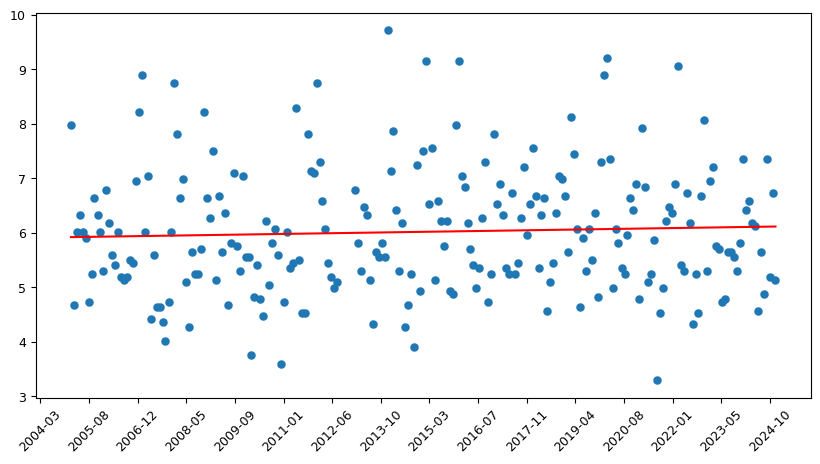

In [170]:
# Create a dataframe with the fields we are interested in
belmullet_mean_wind = pd.read_csv("data/mly2375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
belmullet_mean_wind['wdsp']=round(belmullet_mean_wind['wdsp']*knots_to_metres_per_sec, 2)

# First consolidate the year and month fields into a datetime yyyy-mm format
belmullet_mean_wind['date'] = belmullet_mean_wind['year'].astype(str) + '-' + belmullet_mean_wind['month'].astype(str)
belmullet_mean_wind['date']= pd.to_datetime(belmullet_mean_wind['date'], format='%Y-%m').dt.to_period('m')
belmullet_mean_wind['datestr'] = belmullet_mean_wind['date'].astype(str)
belmullet_mean_wind['datenum'] = mdates.date2num(belmullet_mean_wind['date'])

# Now select the range we are interested in - the last 20 years
date1 = '2005-01'
date2 = '2024-11'
belmullet_mean_wind = belmullet_mean_wind.loc[(belmullet_mean_wind['date']>=date1) & (belmullet_mean_wind['date']<=date2)]
belmullet_mean_wind = belmullet_mean_wind.reset_index(drop=True)
m1, c1 = np.polyfit(belmullet_mean_wind['datenum'], belmullet_mean_wind['wdsp'], 1)
print(m1, c1)

figm, axm = plt.subplots(figsize=(10, 5))
axm.plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axm.plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['datenum']*m1 + c1, 'r-')

date_form = mdates.DateFormatter("%Y-%m")
axm.xaxis.set_major_formatter(date_form)
axm.xaxis.set_major_locator(plt.MaxNLocator(16))
axm.tick_params(axis='x', rotation=45, labelsize=9)
axm.tick_params(axis='y', labelsize=9)

In [173]:
# Create a function for the common actions that will be repeated for each weather station 
def calc_best_fit(mean_wind):

    # Deal with any blanks
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(' ',-999)
    mean_wind['wdsp'] = mean_wind['wdsp'].astype(float)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(-999,np.nan)
    print(mean_wind.dtypes)

    # Convert from knots to m/s
    mean_wind['wdsp']=round(mean_wind['wdsp']*knots_to_metres_per_sec, 2)

    # Consolidate the year and month fields into a datetime yyyy-mm format
    mean_wind['date'] = mean_wind['year'].astype(str) + '-' + mean_wind['month'].astype(str)
    mean_wind['date']= pd.to_datetime(mean_wind['date'], format='%Y-%m').dt.to_period('m')
    mean_wind['datestr'] = mean_wind['date'].astype(str)
    mean_wind['datenum'] = mdates.date2num(mean_wind['date'])

    # Now select the range we are interested in - the last 20 years
    date1 = '2005-01'
    date2 = '2024-11'
    mean_wind = mean_wind.loc[(mean_wind['date']>=date1) & (mean_wind['date']<=date2)]
    mean_wind = mean_wind.reset_index(drop=True)

    m, c = np.polyfit(mean_wind['datenum'], mean_wind['wdsp'], 1)
    print(m, c)
    return m, c, mean_wind

# Create a dataframe for each weather station with the fields we are interested in
dunsany_mean_wind = pd.read_csv("data/mly1375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
dunsany_mean_wind['wdsp']=round(dunsany_mean_wind['wdsp']*knots_to_metres_per_sec, 2)
print("ok")
m2, c2, dunsany_mean_wind = calc_best_fit(dunsany_mean_wind)

johnstown_mean_wind = pd.read_csv("data/mly1775.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("ok2")

m3, c3, johnstown_mean_wind = calc_best_fit(johnstown_mean_wind)

macehead_mean_wind = pd.read_csv("data/mly275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
m4, c4, macehead_mean_wind = calc_best_fit(macehead_mean_wind)

malinhead_mean_wind = pd.read_csv("data/mly1575.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
m5, c5, malinhead_mean_wind = calc_best_fit(malinhead_mean_wind)

valentia_mean_wind = pd.read_csv("data/mly1.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
m6, c6, valentia_mean_wind = calc_best_fit(valentia_mean_wind)

fig_mean, axes_mean = plt.subplots(nrows=3, ncols=2, figsize=(9, 7), sharex='col', sharey='row')
fig_mean.suptitle('Long Term Wind Average across selected Weather Stations', fontsize=16)
fig_mean.subplots_adjust(top = 0.92)
date_form = mdates.DateFormatter("%Y-%m")


axes_mean[0,0].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['wdsp'],'o', markeredgewidth=0.1)
axes_mean[0,0].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['datenum']*m1 + c1, 'r-')
axes_mean[0,0].tick_params(axis='y', labelsize=9)



axes_mean[2,0].xaxis.set_major_formatter(date_form)
axes_mean[2,0].xaxis.set_major_locator(plt.MaxNLocator(16))

axes_mean[2,1].xaxis.set_major_formatter(date_form)
axes_mean[2,1].xaxis.set_major_locator(plt.MaxNLocator(16))

axes_mean[2,0].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,1].tick_params(axis='x', rotation=45, labelsize=9)


#ax_all[0,0].set_title('Belmullet', fontsize=10)
#ax_all[0,0].set_ylabel('Days', fontsize=10)
#ax_all[0,0].tick_params(axis='y', labelsize=8)
#ax_all[0,0].set_ylim(0, 3100)

ok
year       int64
month      int64
wdsp     float64
dtype: object
-6.61564697447821e-06 2.205255738571344
ok2
year       int64
month      int64
wdsp     float64
dtype: object


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
# Now copy in the last 3 years and ewxtrapolate the 1 month rolling mean mean for 10 years.

## References
g1. https://en.wikipedia.org/wiki/Galway_Wind_Park

https://stackoverflow.com/questions/69335720/overlay-shaded-regions-on-a-line-plot-based-on-conditions
